In [3]:
%pip install pandas
%pip install pandasql
%pip install matplotlib

import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# movies.csv - таблица с информацией о фильмах

# movie_id - уникальный идентификатор фильма
# name_rus - название фильма на русском языке
# kp_rating - оценка фильма на Кинопоиске
# movie_duration - продолжительность филмьа в минутах
# kp_rating_count - количество оценок на Кинопоиске
# movie_year - год выхода фильма
# imdb_raiting - оценка фильма на IMDB
# imdb_rating_count - количесвто оценок на IMDB
# genres - жанры
# countries - страны
# budget - бюджет
# critics_raiting - оценка критиков
# name_eng - название фильма на английском языке

In [4]:
df = pd.read_csv('movies.csv')

In [16]:
# Показать список всех жанров фильмов (значения должны быть уникальны)

genres = ps.sqldf('select distinct trim(trim(trim(genres, \']\'), \'[\')) from df').values.tolist()
genres_list = []
for i in range(len(genres)):
    if genres[i][0]:
        genres_list.append(genres[i][0])
genres_set = set(",".join(genres_list).replace(" ", "").split(","))
print(genres_set)

{'церемония', 'история', 'вестерн', 'ужасы', 'аниме', 'реальноеТВ', 'игра', 'драма', 'мелодрама', 'детектив', 'мюзикл', 'документальный', 'музыка', 'новости', 'спорт', 'боевик', 'триллер', 'короткометражка', 'длявзрослых', 'семейный', 'фантастика', 'биография', 'криминал', 'приключения', 'военный', 'фэнтези', 'ток-шоу', 'фильм-нуар', 'комедия', 'детский', 'концерт', 'мультфильм'}


In [119]:
# Показать список всех стран жанров фильмов (значения должны быть уникальны)

ps.sqldf('select countries from df')


,countries
0,[США]
1,[Япония]
2,[США]
3,[Япония]
4,[Канада]
...,...
36412,"[США, Италия]"
36413,[Япония]
36414,[Япония]
36415,[США]


In [97]:
# Показать ТОП-50 комедий с рейтингом 'kp_rating' не ниже заданного и не ниже заданного года производства 'movie_year'

kp_rating = 6
movie_year = 1900

ps.sqldf("""
    select * from df 
    where kp_rating > '""" + str(kp_rating) + """'
        and movie_year > '""" + str(movie_year) + """' 
    order by kp_rating desc 
    limit 50
""")


,movie_id,name_rus,kp_rating,movie_duration,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,budget,critics_rating,name_eng
0,326,Побег из Шоушенка,9.120,142,376610.0,1994,9.3,1572615.0,"[драма, криминал]",[США],$25 000 000,91.0,The Shawshank Redemption
1,435,Зеленая миля,9.072,189,359434.0,1999,8.5,711618.0,"[фэнтези, драма, криминал, детектив]",[США],$60 000 000,80.0,The Green Mile
2,503097,"Hullabaloo: Live at Le Zenith, Paris (видео)",9.057,92,335.0,2002,8.0,278.0,"[документальный, музыка]",[Великобритания],None,NaN,None
3,762381,Космос: Пространство и время (мини-сериал),9.028,557,8616.0,2014,9.4,44412.0,[документальный],[США],None,NaN,Cosmos: A Spacetime Odyssey
4,383870,Антология Beatles (мини-сериал),9.024,600,377.0,1995,9.4,3914.0,"[документальный, музыка]",[Великобритания],None,NaN,The Beatles Anthology
5,77044,Друзья (сериал 1994 – 2004),9.022,22,137463.0,1994,9.0,454018.0,"[комедия, мелодрама]",[США],None,NaN,Friends
6,674243,Счастливые люди (мини-сериал),9.010,55,2927.0,2008,NaN,NaN,[документальный],[Россия],None,NaN,None
7,351771,Depeche Mode: Devotional (видео),8.998,93,820.0,1993,9.2,580.0,"[документальный, музыка, концерт]",[Великобритания],None,NaN,None
8,651374,Моцарт. Рок-опера,8.994,-,441.0,2011,7.5,13.0,[мюзикл],"[Франция, Корея Южная]",€8 000 000,NaN,Mozart l'opéra Rock 3D
9,464963,Игра престолов (сериал 2011 – ...),8.991,55,160456.0,2011,9.5,935980.0,"[фэнтези, драма, приключения]",[США],None,NaN,Game of Thrones


In [39]:
# Показать ТОП-50 фильмов по 'kp_rating' в виде таблицы, а рядом сам рейтинг по 'kp_rating' и по 'imdb_rating'

ps.sqldf("""
    select name_rus, kp_rating, imdb_rating from df 
    order by kp_rating desc 
    limit 50
""")


,name_rus,kp_rating,imdb_rating
0,Побег из Шоушенка,9.120,9.3
1,Зеленая миля,9.072,8.5
2,"Hullabaloo: Live at Le Zenith, Paris (видео)",9.057,8.0
3,Космос: Пространство и время (мини-сериал),9.028,9.4
4,Антология Beatles (мини-сериал),9.024,9.4
5,Друзья (сериал 1994 – 2004),9.022,9.0
6,Счастливые люди (мини-сериал),9.010,NaN
7,Depeche Mode: Devotional (видео),8.998,9.2
8,Моцарт. Рок-опера,8.994,7.5
9,Игра престолов (сериал 2011 – ...),8.991,9.5


In [125]:
# Показать ТОП-50 самых длинных фильмов в виде таблицы, а рядом длину фильма в двух столбцах: "МММ минут" и "ЧЧ.ММ"

ps.sqldf("""
    select name_rus as 'Название', 
    movie_duration || ' минут' as 'МММ', 
    cast(cast(movie_duration as int)/60 as string) || ':' || cast(cast(movie_duration as int)%60 as string) as 'ЧЧ:ММ'
    from df 
    order by cast(movie_duration as int) desc 
    limit 50
""")



,Название,МММ,ЧЧ:ММ
0,Ундина 2: На гребне волны (сериал),4048 минут,67:28
1,Зверобой 3 (сериал),1440 минут,24:0
2,Семейные тайны (мини-сериал),1200 минут,20:0
3,Фирменная история (сериал),1104 минут,18:24
4,Великая Отечественная (сериал),1040 минут,17:20
5,"Литейный, 4 (сериал)",960 минут,16:0
6,Музыкальный фестиваль Live Aid (ТВ),960 минут,16:0
7,Моя леди (сериал),960 минут,16:0
8,"Берлин, Александерплац (мини-сериал)",910 минут,15:10
9,Next 3 (сериал),800 минут,13:20


In [18]:
# Показать список "годов производства" фильмов в порядке убывания в виде таблицы, а рядом количество фильмов и средний рейтинг по 'kp_rating' и 'imdb_rating', и название самого популярного жанра фильма за этот год

ps.sqldf("""
    select 
    movie_year, count(movie_year), avg(kp_rating) from df 
    group by movie_year
    order by movie_year desc 
""")


,movie_year,count(movie_year),avg(kp_rating)
0,2017,1,NaN
1,2016,96,6.461125
2,2015,1066,6.194666
3,2014,1589,6.129420
4,2013,1881,6.167406
...,...,...,...
102,1915,6,6.868000
103,1914,4,6.747500
104,1913,5,6.655000
105,1912,1,6.845000


<AxesSubplot:ylabel='movie_year'>

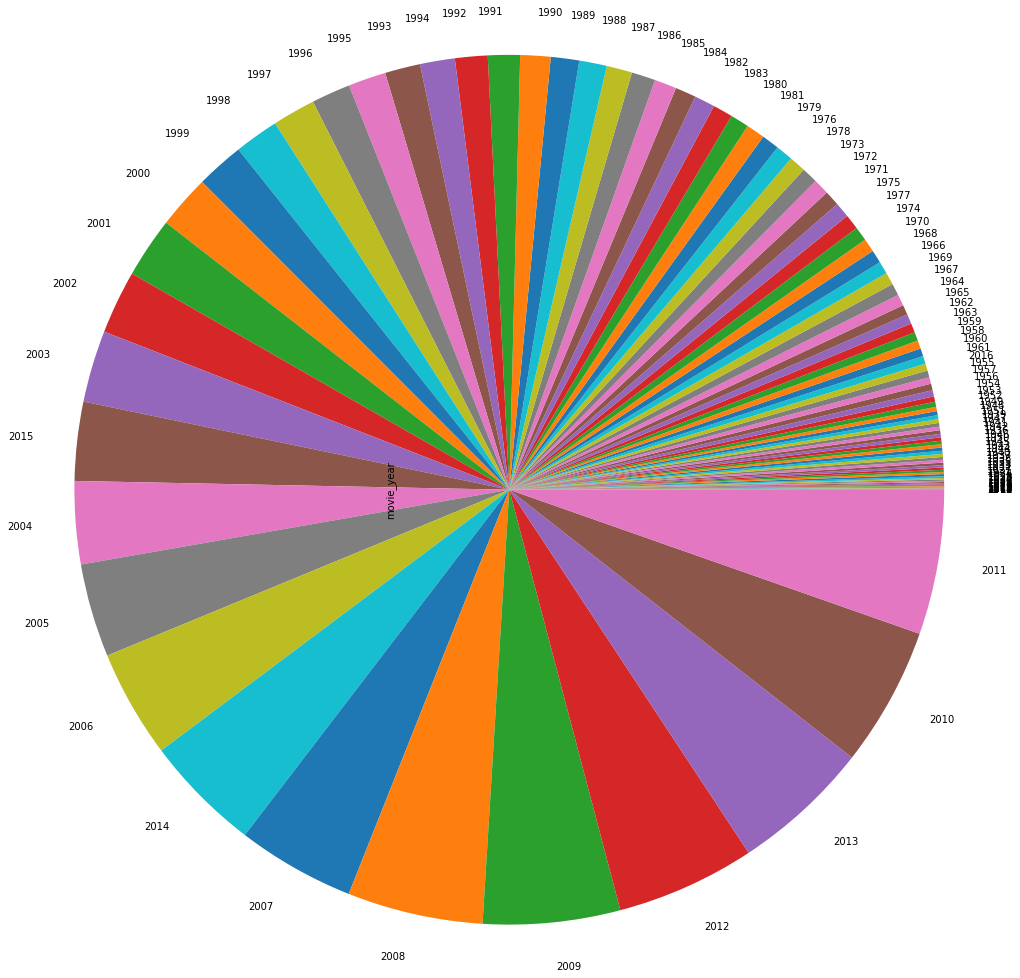

In [12]:
# Построить круговую диаграмму года, сортированную по возрастанию и количество фильмов за каждый год

df['movie_year'].value_counts().sort_values().plot.pie(radius=5)





In [19]:
# Построить круговую диаграмму жанров, сортированную по алфавиту и количество фильмов с каждым жанром


<AxesSubplot:ylabel='Frequency'>

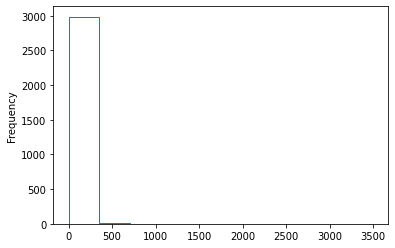

In [37]:
# Построить гистограмму жанров, сортированную по возрастанию и количество фильмов с каждым жанром

df['genres'].value_counts().plot.hist(histtype='step')

<AxesSubplot:ylabel='Frequency'>

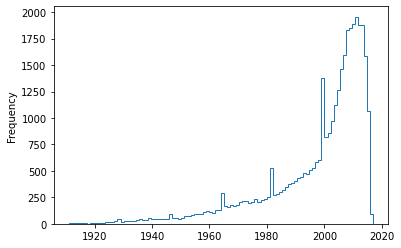

In [32]:
# Построить гистограмму годов производства, сортированную по возрастанию и количество фильмов за каждый год

df['movie_year'].sort_values().plot.hist(bins=100, histtype='step')